# Choosing a K Value 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv(r"C:\Users\user\Desktop\DATA SCIENCE\SpaceMissions (1).csv")

df['Mission Status New'] = LabelEncoder().fit_transform(df['Mission Status'])

data = df.drop(['Company', 'Launch Date', 'Launch Time', 'Launch Site','Vehicle Type','Payload Name','Payload Type','Payload Orbit','Failure Reason','Payload Mass (kg)','Mission Status'], axis = 1)

data = data.dropna()

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Mission Status New'],axis=1), 
                                                    data['Mission Status New'], test_size=0.20, 
                                                    random_state=10)
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train,y_train)

knnmodel_predictions = knnmodel.predict(X_test)

In [11]:
error_rate = []

# Will take some time
for i in range(1,15):
    
    model1 = KNeighborsClassifier(n_neighbors=i)
    model1.fit(X_train,y_train)
    pred_i = model1.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

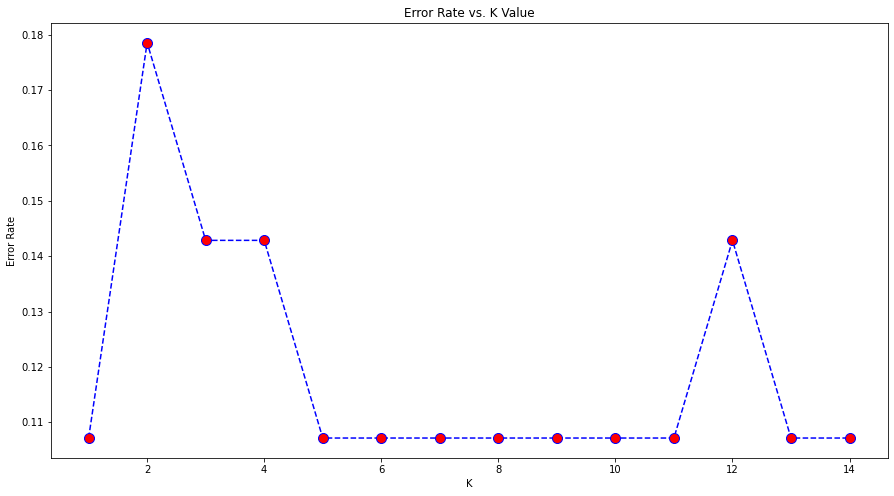

In [12]:
plt.figure(figsize=(15,8))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Comparison

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[ 0  3]
 [ 1 24]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      0.96      0.92        25

    accuracy                           0.86        28
   macro avg       0.44      0.48      0.46        28
weighted avg       0.79      0.86      0.82        28



In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[ 0  3]
 [ 0 25]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.89      1.00      0.94        25

    accuracy                           0.89        28
   macro avg       0.45      0.50      0.47        28
weighted avg       0.80      0.89      0.84        28



For the k=3 accuracy is 86%


For the k=5 accuracy is 89%


From the output we can see that the mean error is minimum when the value of the K is between 5 and 11. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.